In [142]:
import numpy as np # import built-in librairies (super useful)
import matplotlib.pyplot as plt
# make graphics show up in Jupyter notebook
%matplotlib inline 
import os
import pylab

def data_generator(mean, std, n_measurements = 500, n_samples = 20): # function name and arguments
    """
    Generates an array of measurements from a standard distribution.

    Parameters
    ----------
    mean : float
           Desired mean value of the measurements.
           
    std : float
          Desired standard deviation of the measurements.
          
    n_measurements : int, optional
                     Number of separate measurements. Default is 500 measurements.

    n_samples : int, optional
                Number of samples taken per measurement. Default is 20 samples. 
                per measurement.


    Returns
    -------
    data : ndarray, shape (n_measuremets, n_samples)
           Array representing the experimental data. Each measurement 
           (composed of many samples) is a row of this array:
                     -----------------------------------
            meas1    | sample0 | sample1 | sample2 | ...
            meas2    | sample0 | sample1 | sample2 | ...
            meas3    | sample0 | sample1 | sample2 | ...
             ...

    """
    # The following array has n_measurements rows, and n_samples columns
    return np.random.normal(loc = mean, scale = std, size = (n_measurements, n_samples))

In [143]:
data = np.genfromtxt("/home/rohan/Téléchargements/buggsa.csv", delimiter=",", invalid_raise=False)
print(data)

[[2.785 2.481 2.074 1.601 1.125]
 [2.779 2.463 2.099 1.61  1.099]
 [2.774 2.457 1.973 1.62  1.111]
 [2.783 2.405 2.028 1.575 1.098]
 [2.773 2.428 2.028 1.618 1.097]
 [2.773 2.426 2.006 1.623 1.132]
 [2.776 2.462 2.05  1.577 1.127]
 [2.774 2.396 2.037 1.611 1.087]
 [2.769 2.392 2.012 1.609 1.057]
 [2.771 2.419 2.119 1.628 1.086]
 [2.777 2.406   nan   nan   nan]
 [2.776 2.424   nan   nan   nan]
 [2.78  2.429   nan   nan   nan]
 [2.783 2.404   nan   nan   nan]
 [2.782 2.472   nan   nan   nan]
 [2.781 2.384   nan   nan   nan]
 [2.777 2.448   nan   nan   nan]
 [2.778 2.413   nan   nan   nan]
 [2.776 2.42    nan   nan   nan]
 [2.774 2.36    nan   nan   nan]]


Yes, it does make sense to transpose this.

In [144]:
data = np.transpose(data)

So now we handle the nan and put each row into its own python list, run it through numpy again, and put the means into another list.

In [145]:
data_l = []
row = 0
for i in data:
    data_c = []
    for j in i:
        if not np.isnan(j):
            data_c.append(j)
    data_l.append(data_c)
    row += 1

#print(np.array(data_l))

means = []
stds = []
for i in data_l:
    means.append(float(np.mean(np.array(i))))
    stds.append(float(np.std(np.array(i),ddof=1)))

print(means, "\n", stds)

[2.77705, 2.4244499999999998, 2.0425999999999997, 1.6072, 1.1019] 
 [0.004310025033508921, 0.031601923658970035, 0.04426736947233261, 0.018183020162289405, 0.022830048425509546]


These values do agree with manual calculations! We will choose the 2nd distance, 40cm to generate our data.

In [146]:
sim_data = data_generator(means[1], stds[1])

We will now plot this as a histogram:

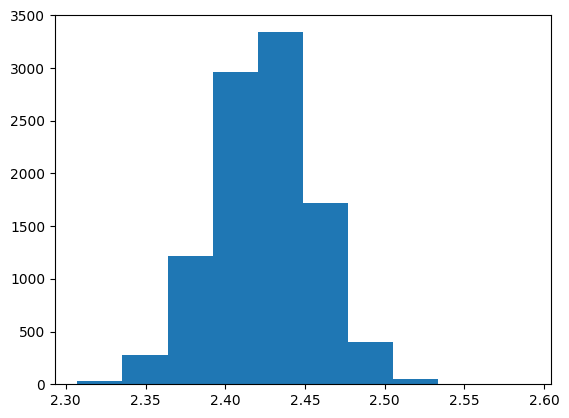

In [147]:
flattened = (sim_data.flatten())
plt.hist(flattened, bins=10);

That doesn't look very Gaussian! Let's change the amount of bins, and see something much more pleasant:

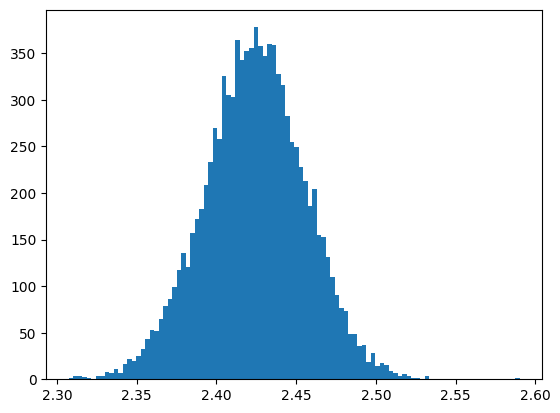

In [157]:
counts, bins, _ = plt.hist(flattened, bins=100); # save the outputs, into variables, of pyplot.hist, ignoring the "patches" return object.

There we go! Let's investigate the mean and standard deviation of that.

In [183]:
print(f"The mean is {np.mean(flattened)}, and the standard deviation is: {np.std(flattened, ddof=1)}.")

The mean is 2.424070256910376, and the standard deviation is: 0.0316571468294553.


In [160]:
# Save the counts (heights of the bars) to a file
np.savetxt("histogram_counts.txt", counts)

# Save the bin edges (edges of the bins) to another file if needed
np.savetxt("histogram_bins.txt", bins)

We will now be plotting a histogram of all of the means from each trial. So we will first make a list of means.

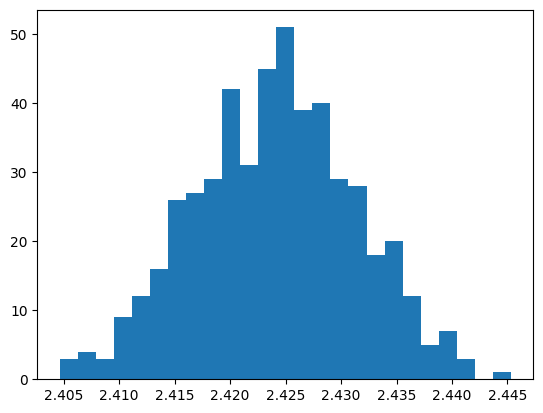

In [171]:
sd_means = []
for i in sim_data:
    sd_means.append(np.mean(i))


sdm_count, sdm_bins, _ = plt.hist(sd_means, bins=25);
np.savetxt("sdm_count.txt", bins)
np.savetxt("sdm_bins.txt", bins)

The means and standard deviations are as follows:

In [197]:
mean_means = np.mean(sd_means)
mean_stds = np.std(sd_means, ddof=1)
print(f"The mean of the means is: {mean_means}, and the standard deviation is: {mean_stds}")

The mean of the means is: 2.4240702569103756, and the standard deviation is: 0.007276675394609284


Okay, quick detour, let's find the area under our histogram so that we can normalize our Gaussian.

In [204]:
def area_of_bins(counts, bins):
    area = 0
    width = bins[1] - bins[0]
    for i in counts:
        area += width * i
    # the width is constant if you specify bins= as an integer, within plt.hist(), as said in documentation
    return float(area)
    
#area_of_bins(sdm_count, sdm_bins);

Great! With that out of the way, let me start getting my values for my Gaussian. Let's make a function:

In [194]:
def gaussian(x, mu, sigma):
    return (1)/(sigma * np.sqrt(2*np.pi)) * np.exp(    -1 * ( ((x-mu)**2)/( 2 * (sigma**2) ) )  )

In [205]:
outputs = []
for i in np.linspace(2, 3, num=500):
    outputs.append(gaussian(i, mean_means, mean_stds))